  1.Download the dataset: Dataset
data set is churn_modeling.csv



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
%matplotlib inline


In [18]:
pd.options.display.max_rows = 10
pd.options.display.float_format = '{:,.2f}'.format #supress scientific notation
plt.rcParams['figure.figsize'] = (16,8)

In [22]:
data = pd.read_csv("Churn_Modelling.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,"101,348.88",1
1,2,15647311,Hill,608,Spain,Female,41,1,"83,807.86",1,0,1,"112,542.58",0
2,3,15619304,Onio,502,France,Female,42,8,"159,660.80",3,1,0,"113,931.57",1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,"93,826.63",0
4,5,15737888,Mitchell,850,Spain,Female,43,2,"125,510.82",1,1,1,"79,084.10",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,"96,270.64",0
9996,9997,15569892,Johnstone,516,France,Male,35,10,"57,369.61",1,1,1,"101,699.77",0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,"42,085.58",1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,"75,075.31",2,1,0,"92,888.52",1


2.Load the dataset.


In [23]:
data.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


Perform Below Visualizations. ● Univariate Analysis ● Bi - Variate Analysis ● Multi - Variate Analysis


In [25]:
import seaborn as sns


 Uni-Variate Analysis



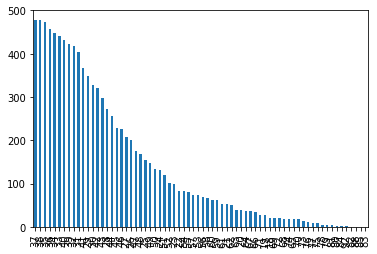

In [28]:
#univariate
data['Age'].value_counts().head(10000).plot.bar()


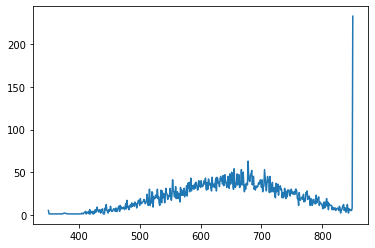

In [29]:
data['CreditScore'].value_counts().sort_index().plot.line()


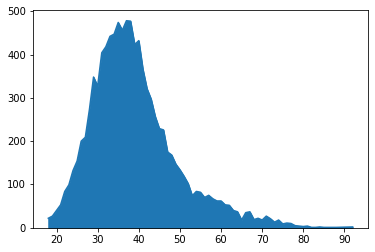

In [30]:
data['Age'].value_counts().sort_index().plot.area()


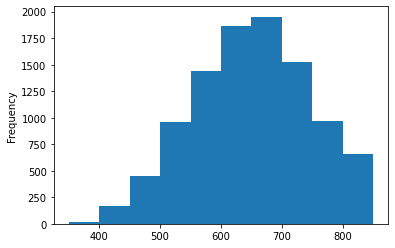

In [31]:
data['CreditScore'].plot.hist()


Bi-Variate Analysis


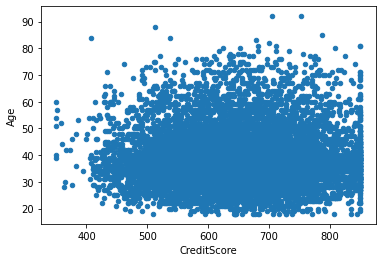

In [32]:
data[data['CreditScore']<100000].plot.scatter(x='CreditScore', y='Age')


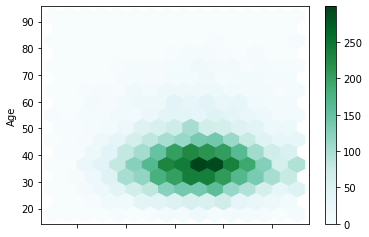

In [33]:
data[data['CreditScore']<100000].plot.hexbin(x='CreditScore', y='Age',gridsize=15)


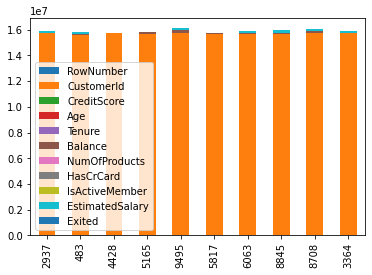

In [34]:
data.sample(10).plot.bar(stacked=True)


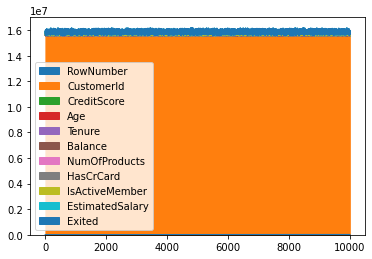

In [35]:
data.plot.area()


Multi-Variate Analysis


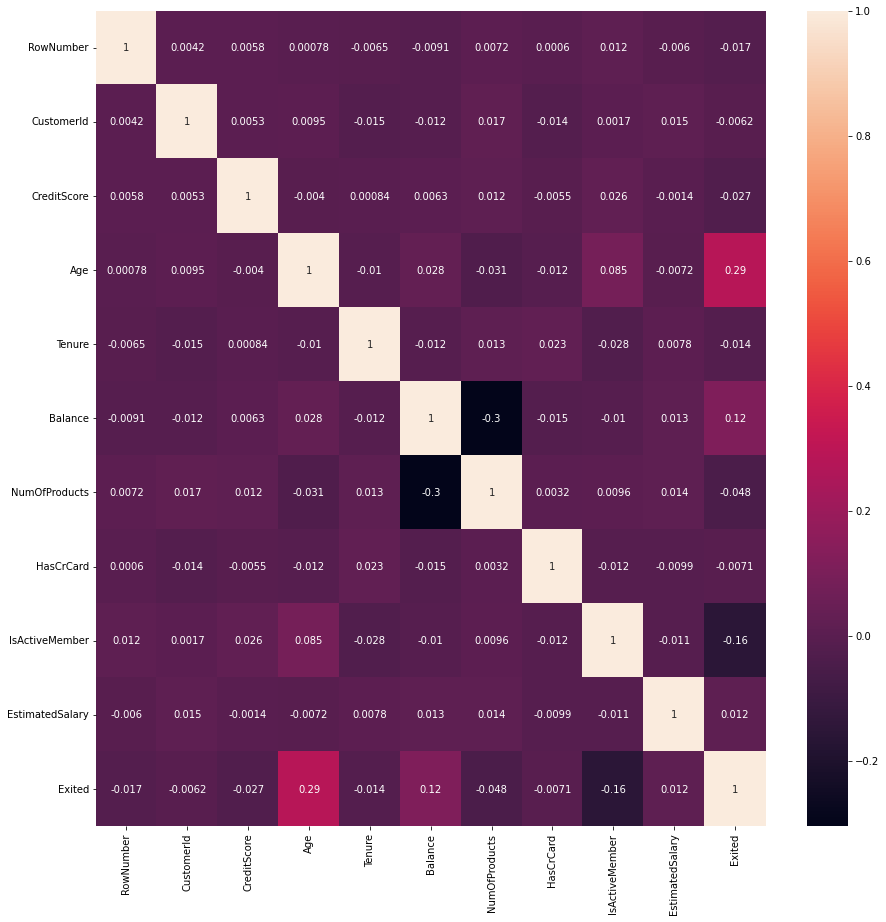

In [36]:
plt.figure(figsize = (15,15))
sns.heatmap(data.corr(), annot = True)


Descriptive Statistics


In [37]:
data.describe


<bound method NDFrame.describe of       RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
0             1    15634602   Hargrave          619    France  Female   42   
1             2    15647311       Hill          608     Spain  Female   41   
2             3    15619304       Onio          502    France  Female   42   
3             4    15701354       Boni          699    France  Female   39   
4             5    15737888   Mitchell          850     Spain  Female   43   
...         ...         ...        ...          ...       ...     ...  ...   
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumO

Check Missing Values


In [39]:
def num_cat_features(df):
    num_cols = []
    cat_cols = []
    s= df.dtypes
    for i in s.index:
        if (s[i] == 'int64' or s[i] == 'float64'):
            num_cols.append(i)
        elif s[i]== 'object':
            cat_cols.append(i)
        else:
            pass
    return num_cols, cat_cols

num_col, cat_col = num_cat_features(data)

In [40]:
data[num_col].head()
data[cat_col].head()


,Surname,Geography,Gender
0,Hargrave,France,Female
1,Hill,Spain,Female
2,Onio,France,Female
3,Boni,France,Female
4,Mitchell,Spain,Female


Find And Replace Outliers


In [41]:
data.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace=True)


In [42]:
def detect_outlier(data):
  outlier = []
  threshold = 3
  mean = np.mean(data)
  std = np.std(data)
  for i in data:
    z_score = (i - mean)/std
    if np.abs(z_score)>threshold:
      outlier.append(i)
  return outlier
CreditScore_list = data['CreditScore'].tolist()
Balance_list = data['Balance'].tolist()
EstimatedSalary_list = data['EstimatedSalary'].tolist()
CreditScore_outlier = detect_outlier(CreditScore_list)
CreditScore_outlier


[359, 350, 350, 358, 351, 350, 350, 350]

In [43]:
Balance_outlier = detect_outlier(Balance_list)
Balance_outlier
EstimatedSalary_outlier = detect_outlier(EstimatedSalary_list)
EstimatedSalary_outlier

[]

In [44]:
print("Shape of Data before removing outliers: {}".format(data.shape))


Shape of Data before removing outliers: (10000, 11)


In [45]:
data.drop(data[data['CreditScore'] <= 359].index, inplace = True)


In [46]:
print("Shape of Data after removing outliers: {}".format(data.shape))


Shape of Data after removing outliers: (9992, 11)


Check for Categorical columns and perform encoding.


In [53]:
data.dtypes



CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
                    ...   
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
Length: 11, dtype: object

In [60]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
data['Geography']=le.fit_transform(data['Geography'])
data['Gender']=le.fit_transform(data['Gender'])
data.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,"101,348.88",1
1,608,2,0,41,1,"83,807.86",1,0,1,"112,542.58",0
2,502,0,0,42,8,"159,660.80",3,1,0,"113,931.57",1
3,699,0,0,39,1,0.00,2,0,0,"93,826.63",0
4,850,2,0,43,2,"125,510.82",1,1,1,"79,084.10",0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,"101,348.88",1
1,608,2,0,41,1,"83,807.86",1,0,1,"112,542.58",0
2,502,0,0,42,8,"159,660.80",3,1,0,"113,931.57",1
3,699,0,0,39,1,0.00,2,0,0,"93,826.63",0
4,850,2,0,43,2,"125,510.82",1,1,1,"79,084.10",0


Scale the independent variables


In [ ]:
y=data['Exited']
x=dataset.drop(columns=['Exited','RowNumber','Surname'],axis=1)



In [78]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 9992, dtype: int64

In [94]:
 X

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,"101,348.88"
1,608,2,0,41,1,"83,807.86",1,0,1,"112,542.58"
2,502,0,0,42,8,"159,660.80",3,1,0,"113,931.57"
3,699,0,0,39,1,0.00,2,0,0,"93,826.63"
4,850,2,0,43,2,"125,510.82",1,1,1,"79,084.10"
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.00,2,1,0,"96,270.64"
9996,516,0,1,35,10,"57,369.61",1,1,1,"101,699.77"
9997,709,0,0,36,7,0.00,1,0,1,"42,085.58"
9998,772,1,1,42,3,"75,075.31",2,1,0,"92,888.52"


Scale the independent variables


In [98]:
col_names=X.columns
from sklearn.preprocessing import scale


In [100]:
X=scale(X)
X

array([[-0.32982106, -0.90188413, -1.09628967, ...,  0.64614706,
         0.97002471,  0.0225562 ],
       [-0.44402642,  1.51507342, -1.09628967, ..., -1.54763529,
         0.97002471,  0.21719581],
       [-1.54455077, -0.90188413, -1.09628967, ...,  0.64614706,
        -1.03090157,  0.24134801],
       ...,
       [ 0.6045864 , -0.90188413, -1.09628967, ..., -1.54763529,
         0.97002471, -1.0079329 ],
       [ 1.25867162,  0.30659464,  0.91216768, ...,  0.64614706,
        -1.03090157, -0.12455523],
       [ 1.46631773, -0.90188413, -1.09628967, ...,  0.64614706,
        -1.03090157, -1.07565692]])

In [101]:
X=pd.DataFrame(X,columns=col_names) 
X


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,-0.33,-0.90,-1.10,0.29,-1.04,-1.23,-0.91,0.65,0.97,0.02
1,-0.44,1.52,-1.10,0.20,-1.39,0.12,-0.91,-1.55,0.97,0.22
2,-1.54,-0.90,-1.10,0.29,1.03,1.33,2.53,0.65,-1.03,0.24
3,0.50,-0.90,-1.10,0.01,-1.39,-1.23,0.81,-1.55,-1.03,-0.11
4,2.07,1.52,-1.10,0.39,-1.04,0.79,-0.91,0.65,0.97,-0.36
...,...,...,...,...,...,...,...,...,...,...
9987,1.25,-0.90,0.91,0.01,-0.00,-1.23,0.81,0.65,-1.03,-0.07
9988,-1.40,-0.90,0.91,-0.37,1.72,-0.31,-0.91,0.65,0.97,0.03
9989,0.60,-0.90,-1.10,-0.28,0.69,-1.23,-0.91,-1.55,0.97,-1.01
9990,1.26,0.31,0.91,0.29,-0.70,-0.02,0.81,0.65,-1.03,-0.12


Split the data into training and testing


In [106]:
from sklearn.model_selection import train_test_split
X_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
X_train.shape




(7993, 10)